In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

connct = psycopg2.connect('dbname=WhiskyAdvocate user= postgres password = [redacted] host = 127.0.0.1 port=5432')

In [2]:
#Query the database to recover the needed data for unsupervised learning operations

ds_query = ''' SELECT whiskey_stats.percent_abv, vector_description.*
                FROM whiskey_stats
                INNER JOIN vector_description
                ON whiskey_stats.whiskey_id = vector_description.whiskey_id;'''

ml_df_full = pd.read_sql(ds_query, connct)

ml_df_full.head()

,percent_abv,oak,vanilla,sweet,chocolate,fruit,spice,orange,pepper,cinnamon,...,toasted,tobacco,licorice,nuts,floral,bitter,complex,subtle,coconut,whiskey_id
0,45.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,40.0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,50.0,2,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,45.2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,45.0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [3]:
#close the connection
connct.close()

In [4]:
#git rid of whiskey_id

ml_df = ml_df_full.drop(['whiskey_id'], axis = 1)

#check for missing values
ml_df.isnull().sum()

percent_abv    0
oak            0
vanilla        0
sweet          0
chocolate      0
fruit          0
spice          0
orange         0
pepper         0
cinnamon       0
smoke          0
caramel        0
sherry         0
toffee         0
honey          0
apple          0
citrus         0
ginger         0
peat           0
lemon          0
dry            0
leather        0
sugar          0
cherry         0
toasted        0
tobacco        0
licorice       0
nuts           0
floral         0
bitter         0
complex        0
subtle         0
coconut        0
dtype: int64

# Visualize separation in data using t-SNE

In [33]:
#import libraries for tSNE and min/max scaler to make sure dimensions have equal 
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [34]:
#scale the data using minmaxscaler

scaler = MinMaxScaler().fit(ml_df)

ml_scale = scaler.transform(ml_df)

ml_scale


array([[0.44515103, 0.        , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.36565978, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.52464229, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.44515103, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56438792, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41335453, 0.16666667, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
# TSNE the scaled data using default hyperparameters and try to visualize it

tsne1 = TSNE(random_state=42)

ws_tsne1 = tsne1.fit_transform(ml_scale)

ws_tsne1

array([[ 20.5395   , -41.72501  ],
       [ 24.551926 , -35.58585  ],
       [-29.641855 ,  19.75275  ],
       ...,
       [ 21.279581 ,  54.822647 ],
       [ 48.016693 , -13.660108 ],
       [ -7.247269 ,  -3.5256534]], dtype=float32)

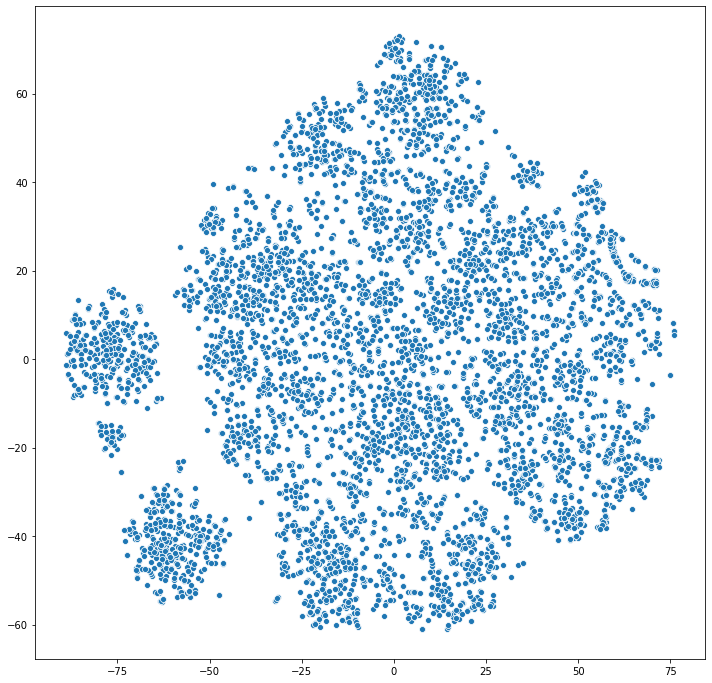

In [36]:
# Unpack and visualize the data from the tsne

tsne_1_x = []
tsne_1_y = []

#I am going to write my unpacking protocol as a function
#this way I can reuse it for additional reps

def tsne_unpack(tsne_array, list1, list2):
    for t in tsne_array:
        list1.append(t[0])
        list2.append(t[1])

tsne_unpack(ws_tsne1, tsne_1_x, tsne_1_y)

#function verified by printing tsne_1_x

#visualize the data using a scatter plot from seaborn
plt.figure(figsize = (12, 12))
sns.scatterplot(x = tsne_1_x, y = tsne_1_y)

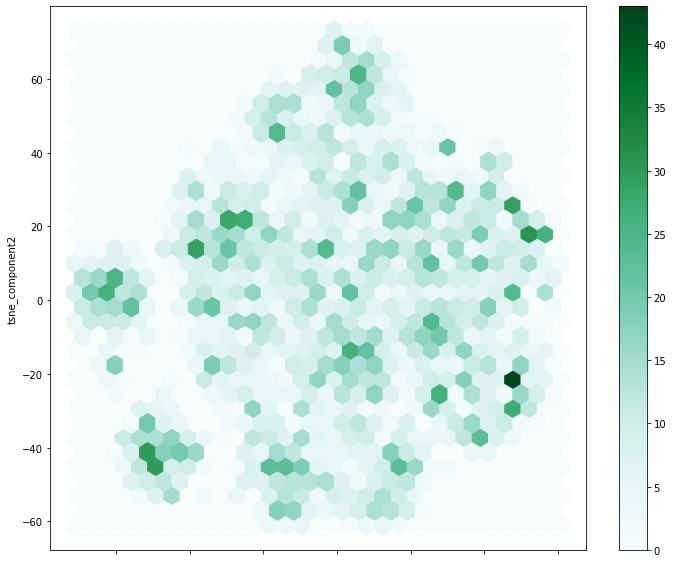

In [37]:
#try to visualize the same thing with a hexbin

tsne_1_dict = {'tsne_component1': tsne_1_x, 'tsne_component2': tsne_1_y}

tsne_vs_df = pd.DataFrame(tsne_1_dict)

tsne_vs_df.plot.hexbin(x = 'tsne_component1', y='tsne_component2', gridsize = 30, figsize = (12, 10))

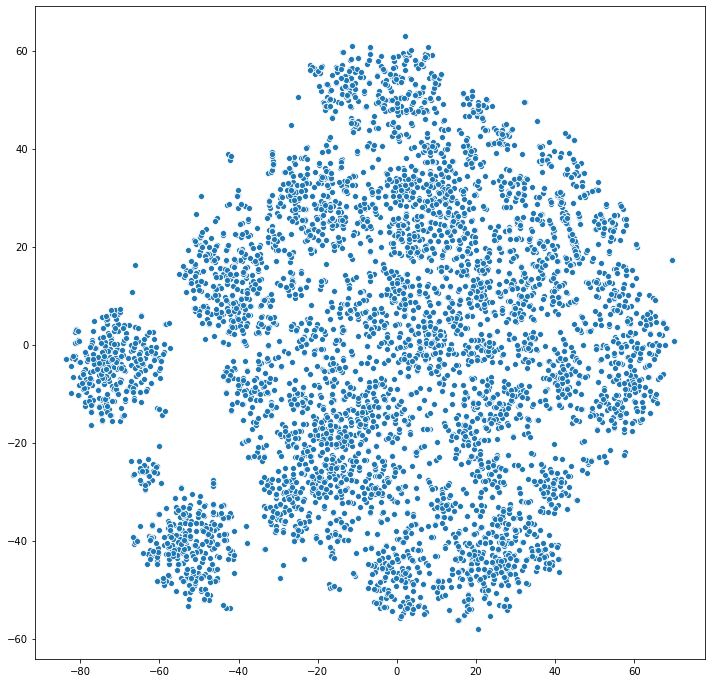

In [38]:
#write a function to aid the optimization run

def visny_tsne(tsne_instantiation):
    
    ws_tsne_iter = tsne_instantiation.fit_transform(ml_scale)
    
    tsne_x = []
    tsne_y = []
    
    tsne_unpack(ws_tsne_iter, tsne_x, tsne_y)
    
    plt.figure(figsize = (12, 12))
    sns.scatterplot(x = tsne_x, y = tsne_y)
    plt.show()
    
tsne2 = TSNE(random_state=42, perplexity = 40)

visny_tsne(tsne2)

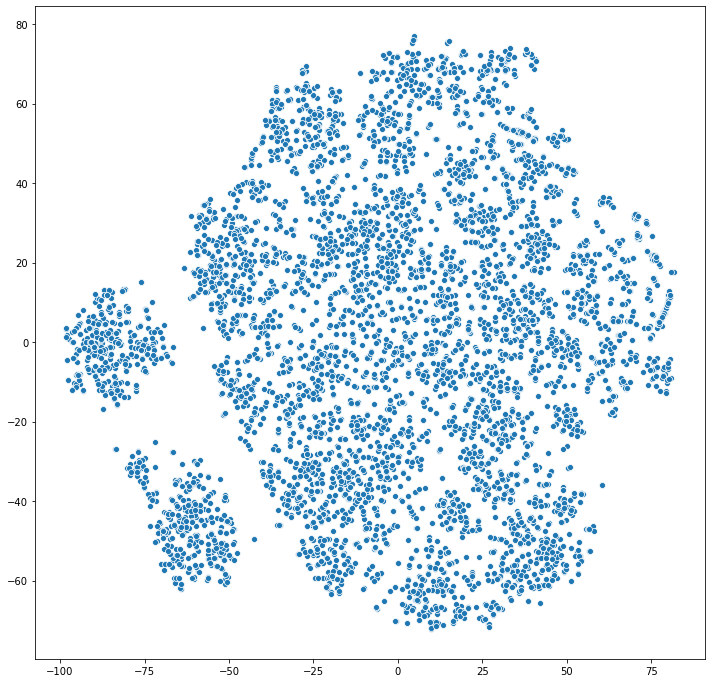

In [39]:
#I can see some clusters, but I'm not satisfied with the separation and want to tune some parameters

tsne3 = TSNE(random_state=42, perplexity = 20)

visny_tsne(tsne3)

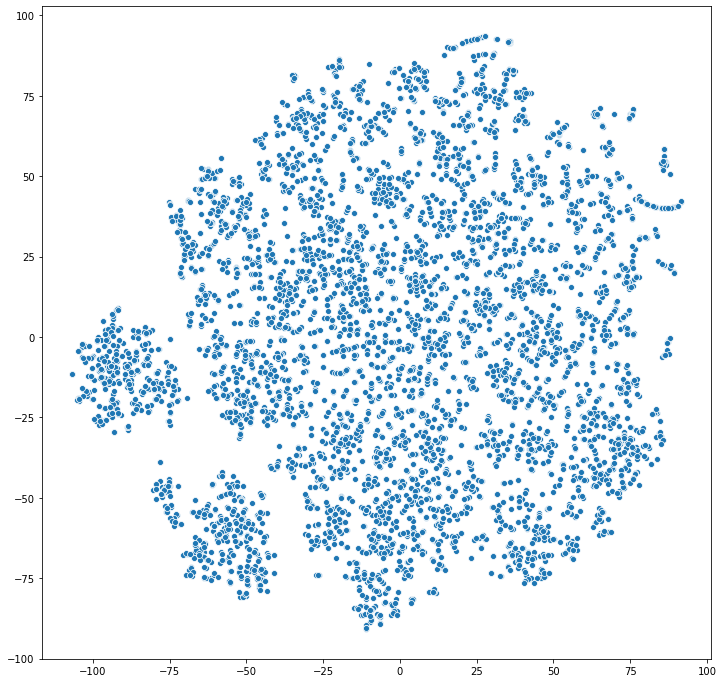

In [40]:
tsne4 = TSNE(random_state=42, perplexity = 10)

visny_tsne(tsne4)

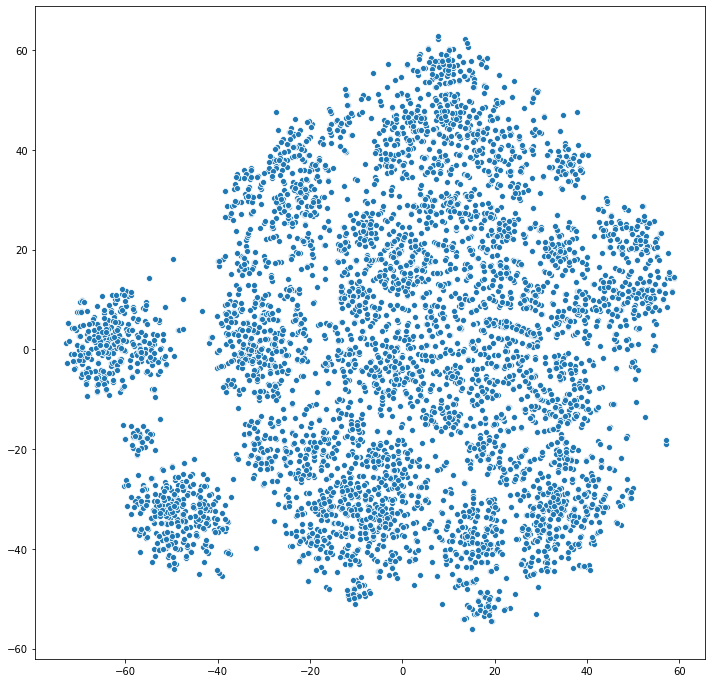

In [41]:
tsne5 = TSNE(random_state=42, perplexity = 50)

visny_tsne(tsne5)

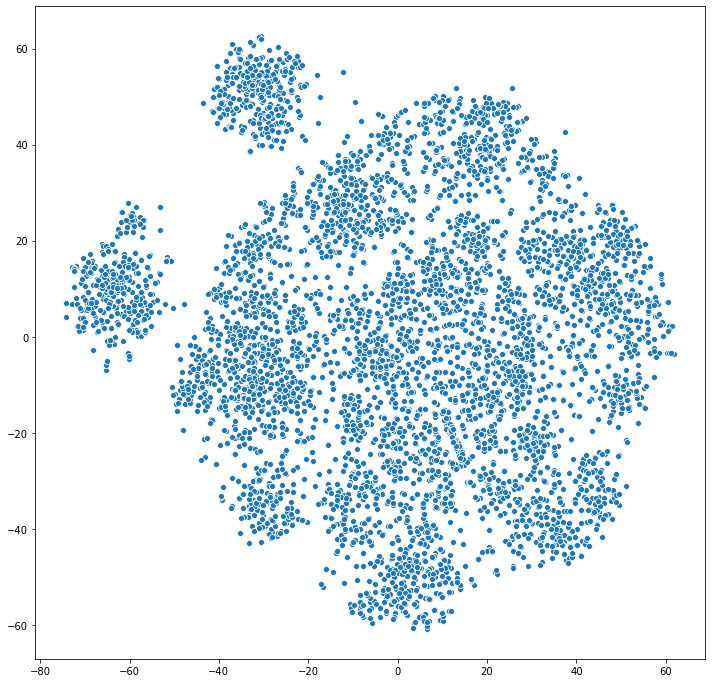

In [42]:
tsne6 = TSNE(random_state=42, perplexity = 50, learning_rate = 300)

visny_tsne(tsne6)

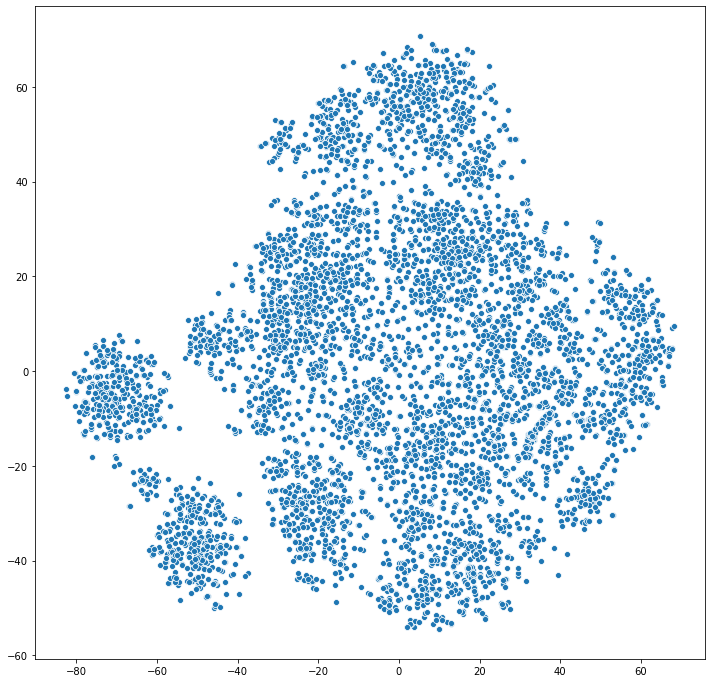

In [43]:
tsne7 = TSNE(random_state=42, perplexity = 50, learning_rate = 600)

visny_tsne(tsne7)

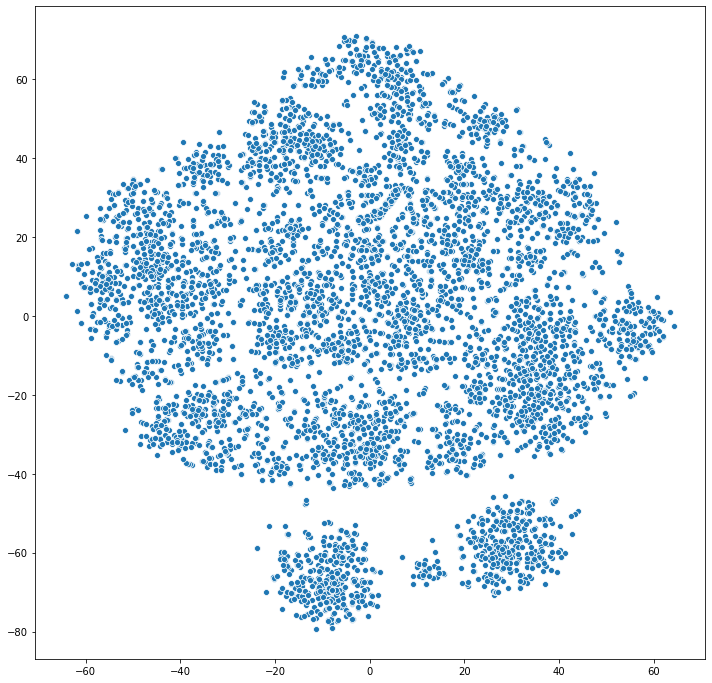

In [44]:
tsne8 = TSNE(random_state=42, perplexity = 50, learning_rate = 450)

visny_tsne(tsne8)

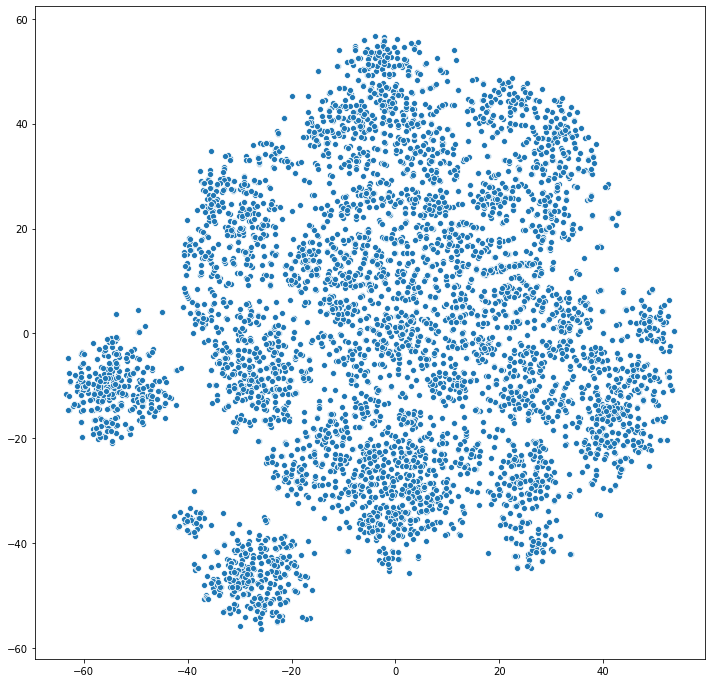

In [45]:
tsne9 = TSNE(random_state=42, perplexity = 50, learning_rate = 100)

visny_tsne(tsne9)

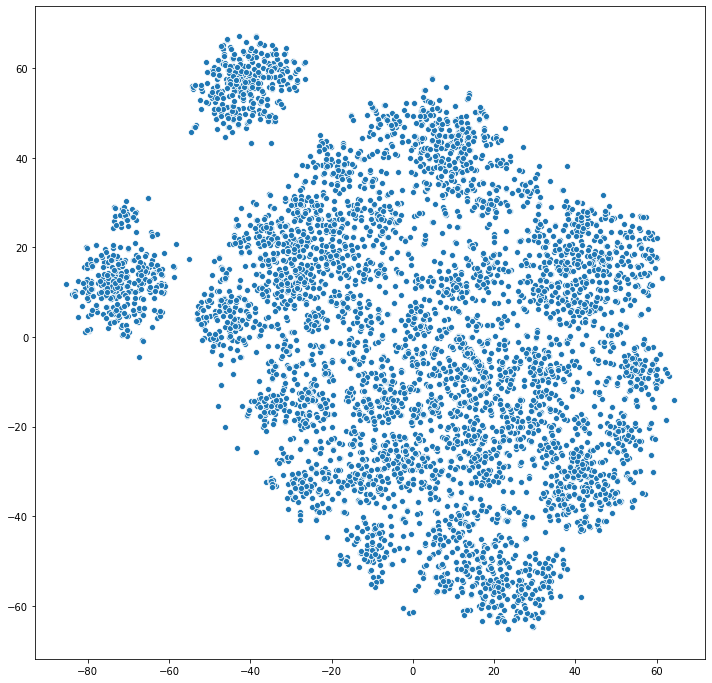

In [46]:
tsne10 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000)

visny_tsne(tsne10)

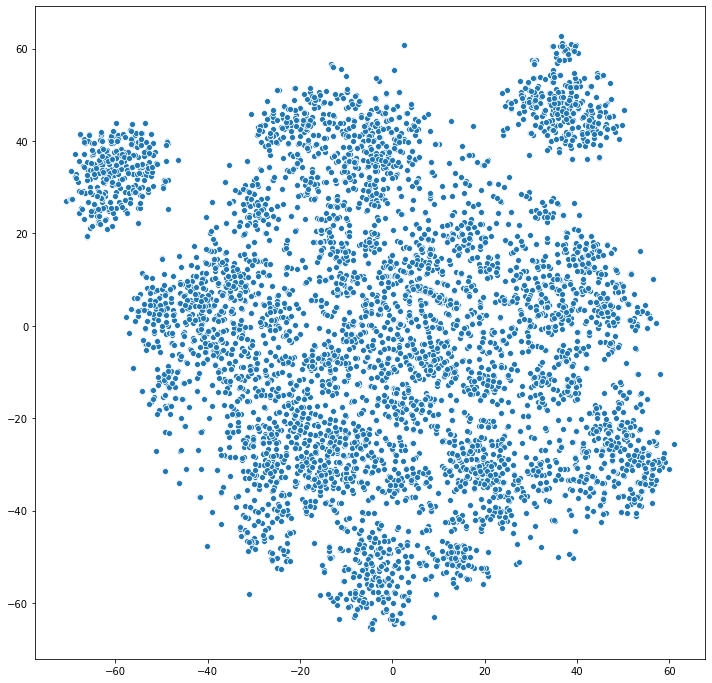

In [47]:
tsne11 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 20)

visny_tsne(tsne11)

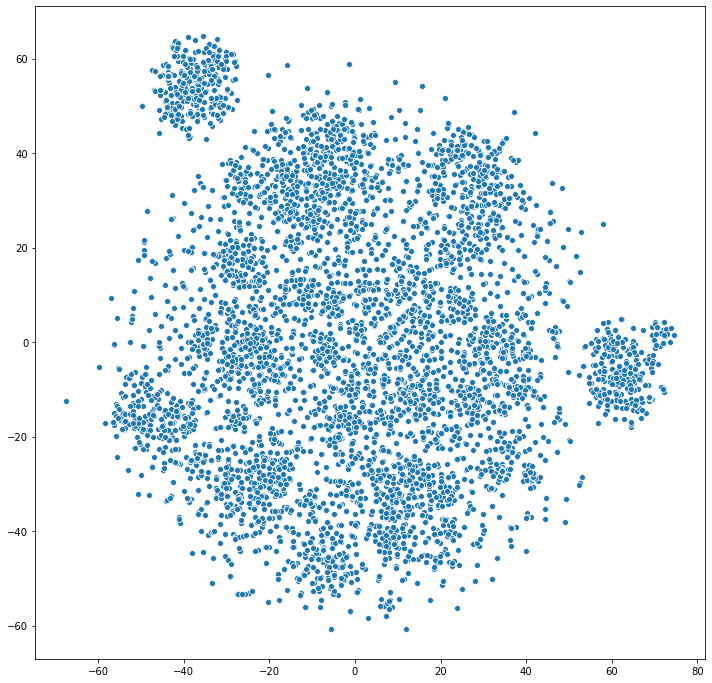

In [48]:
tsne12 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 30)

visny_tsne(tsne12)

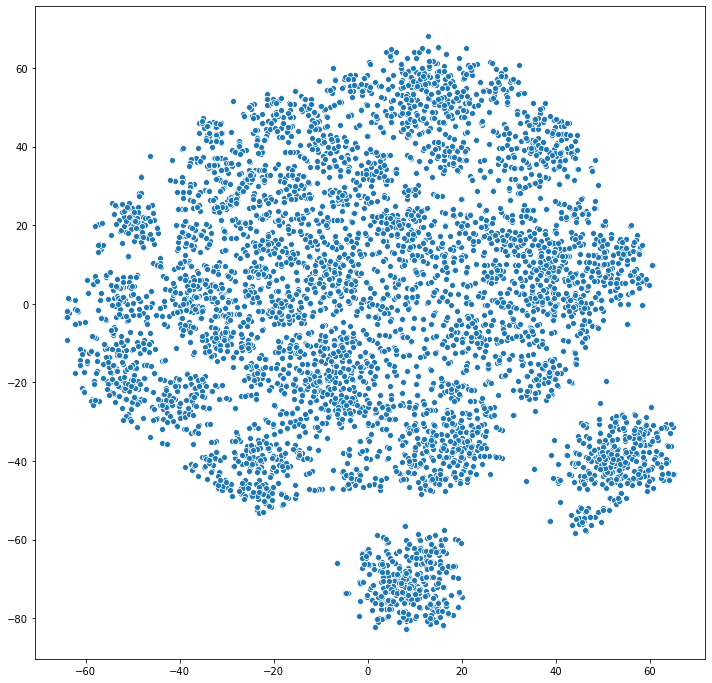

In [49]:
tsne13 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 6)

visny_tsne(tsne13)

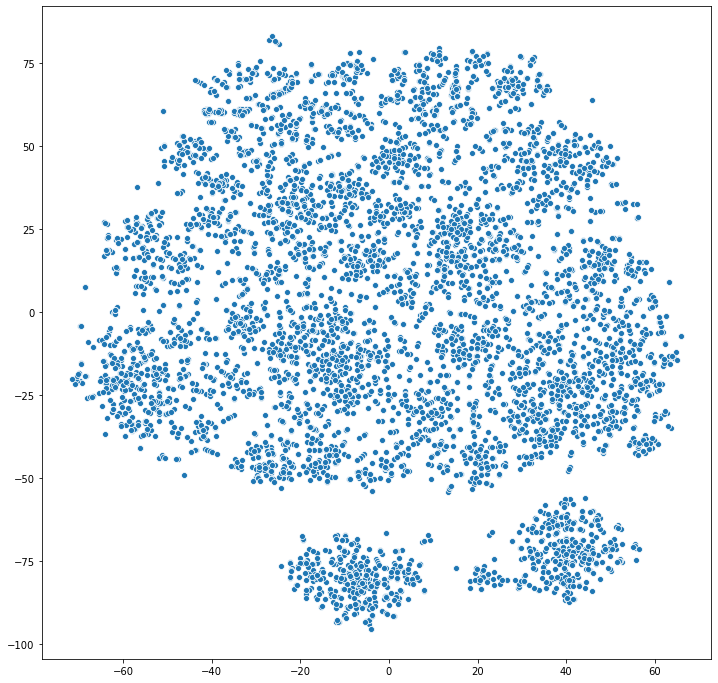

In [50]:
#try lower perplexity with a higher learning rate

tsne14 = TSNE(random_state=42, perplexity = 30, learning_rate = 1000)

visny_tsne(tsne14)

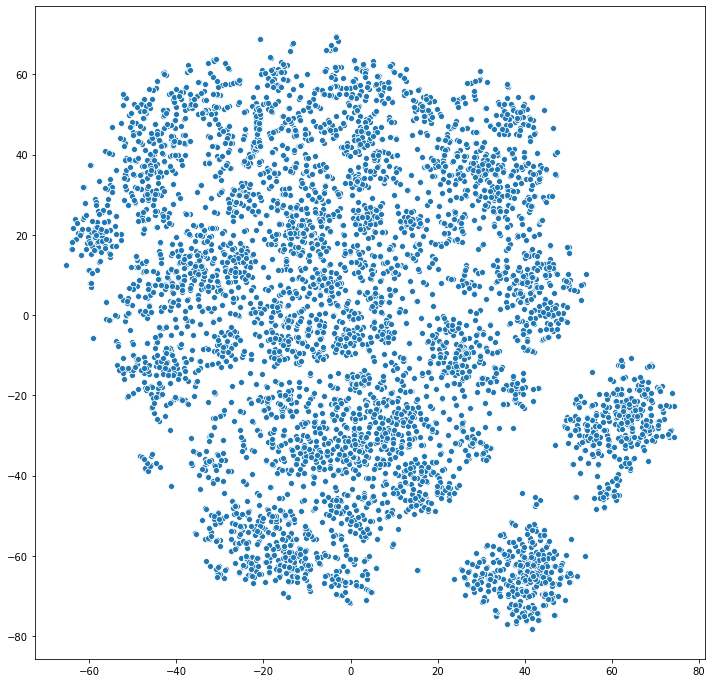

In [51]:
tsne15 = TSNE(random_state=42, perplexity = 40, learning_rate = 1000)

visny_tsne(tsne15)

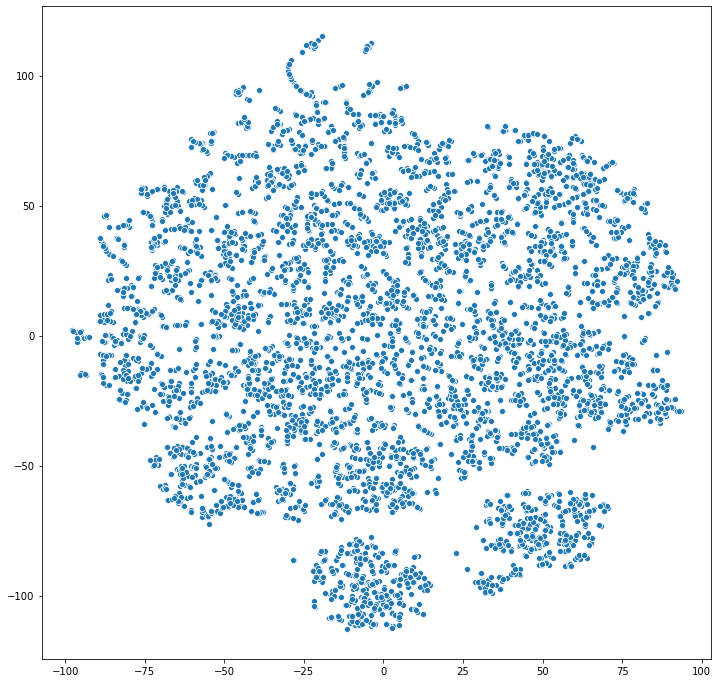

In [52]:
tsne16 = TSNE(random_state=42, perplexity = 10, learning_rate = 1000)

visny_tsne(tsne16)

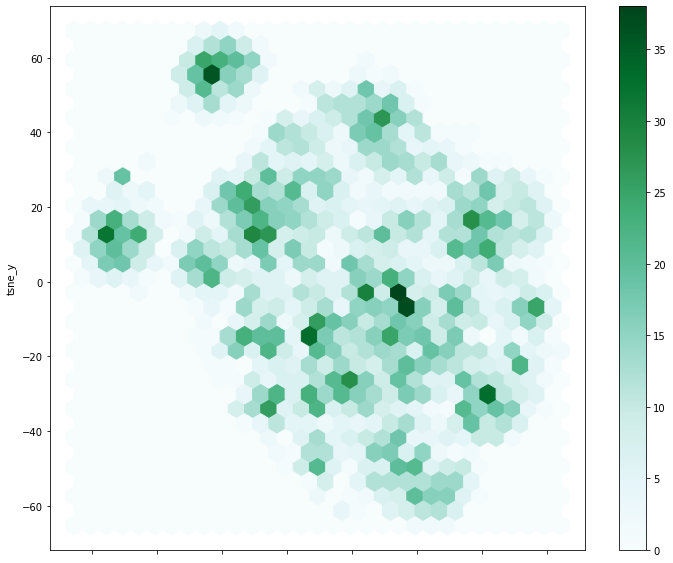

In [53]:
#t-SNE 10 looks like it obtained the best results, although it doesn't look like the data separates that well into clusters
#visualize this tsne using a hexbin plot

ws_tsne_max = tsne10.fit_transform(ml_scale)
    
tsne_x_max = []
tsne_y_max = []
    
tsne_unpack(ws_tsne_max, tsne_x_max, tsne_y_max)

tsne_max_dict = {'tsne_x': tsne_x_max, 'tsne_y': tsne_y_max}

tsne_max_df = pd.DataFrame(tsne_max_dict)

tsne_max_df.plot.hexbin(x = 'tsne_x', y='tsne_y', gridsize = 30, figsize = (12, 10))

plt.show()